In [139]:
import streamlit as st
import pandas as pd
import re
from urlextract import URLExtract
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import emoji
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('Agg')
import plotly.express as px
import seaborn as sns

Validate Regex : https://regex101.com/

# Data Cleaning

In [140]:
# Closing the file in important for preventing data access later and for other programs to access the file also.
f = open("_chat 3.txt")
data = f.read()
f.close()

In [141]:
# For AM, PM Formatted Time
pattern = "\[\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}:\d{1,2}\s[APap][Mm]\]\s"

In [142]:
message = re.split(pattern, data)[1:]

In [143]:
dates = re.findall(pattern, data)

In [144]:
df = pd.DataFrame({'user_message':message, 'date':dates})

- %d matches the day of the month.
- %m matches the month.
- %y matches the two-digit year.
- %I matches the hour (12-hour clock).
- %M matches the minutes.
- %S matches the seconds.
- %p matches "AM" or "PM" in a case-insensitive manner.

In [145]:
df['date'] = pd.to_datetime(df['date'],format='[%d/%m/%y, %I:%M:%S %p] ')

In [146]:
df.head(10)

,user_message,date
0,Blogging Masters Program: ‎Messages and calls ...,2019-08-07 14:44:43
1,Blogging Masters Program: ‎Group creator creat...,2019-08-07 14:44:43
2,Blogging Masters Program: ‎You were added\n,2019-08-07 14:44:43
3,‪+91 70565 65602‬: ‎‪+91 70565 65602‬ left\n‎,2022-04-14 13:13:17
4,Farhan Amit Sir: ‎image omitted\n,2022-04-14 12:51:06
5,Ankit Bhai Ezoic: Ha\n,2022-04-14 12:53:27
6,Farhan Amit Sir: Payment krne pr active ho jay...,2022-04-14 12:53:45
7,Ankit Bhai Ezoic: Nhi mat karna paisa atak jae...,2022-04-14 12:54:10
8,Farhan Amit Sir: Ye personal account hai disab...,2022-04-14 12:54:45
9,Farhan Amit Sir: ‎image omitted\n,2022-04-14 12:55:18


In [147]:
df.shape

(1324, 2)

In [148]:
# Separting user and message
users = []
messages = []
for message in df['user_message']:
    line = re.split('([\w\W]+?):\s', message)
    users.append(line[1])
    messages.append(line[2])
df['user'] = users
df['message'] = messages
df.drop(columns='user_message', inplace=True)

In [149]:
df.head()

,date,user,message
0,2019-08-07 14:44:43,Blogging Masters Program,‎Messages and calls are end-to-end encrypted. ...
1,2019-08-07 14:44:43,Blogging Masters Program,‎Group creator created this group\n
2,2019-08-07 14:44:43,Blogging Masters Program,‎You were added\n
3,2022-04-14 13:13:17,‪+91 70565 65602‬,‎‪+91 70565 65602‬ left\n‎
4,2022-04-14 12:51:06,Farhan Amit Sir,‎image omitted\n


In [150]:
df.isnull().sum()

date       0
user       0
message    0
dtype: int64

In [151]:
#Extracting Years, Months, Days
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [152]:
df.head(10)

,date,user,message,year,month,day,hour,minute
0,2019-08-07 14:44:43,Blogging Masters Program,‎Messages and calls are end-to-end encrypted. ...,2019,August,7,14,44
1,2019-08-07 14:44:43,Blogging Masters Program,‎Group creator created this group\n,2019,August,7,14,44
2,2019-08-07 14:44:43,Blogging Masters Program,‎You were added\n,2019,August,7,14,44
3,2022-04-14 13:13:17,‪+91 70565 65602‬,‎‪+91 70565 65602‬ left\n‎,2022,April,14,13,13
4,2022-04-14 12:51:06,Farhan Amit Sir,‎image omitted\n,2022,April,14,12,51
5,2022-04-14 12:53:27,Ankit Bhai Ezoic,Ha\n,2022,April,14,12,53
6,2022-04-14 12:53:45,Farhan Amit Sir,Payment krne pr active ho jayega kya\n,2022,April,14,12,53
7,2022-04-14 12:54:10,Ankit Bhai Ezoic,Nhi mat karna paisa atak jaega\n,2022,April,14,12,54
8,2022-04-14 12:54:45,Farhan Amit Sir,Ye personal account hai disabled ho gya hai bu...,2022,April,14,12,54
9,2022-04-14 12:55:18,Farhan Amit Sir,‎image omitted\n,2022,April,14,12,55


In [153]:
# Removeing Group Name it's alays at postion 0
users_list = df["user"].unique().tolist()
if len(users_list) > 2:
    users_list.remove(users_list[0])
print(users_list)

['\u202a+91\xa070565\xa065602\u202c', 'Farhan Amit Sir', 'Ankit Bhai Ezoic', '~\u202fPranay Meshram', '~\u202fTaqui', 'Amit Mishra', '~\u202fBanti Pataskar', 'Riddhish Chaudhari', '~\u202fSaptarshi dhar', '~\u202fAmit', '~\u202fKhushi', '~\u202fThe Uttam Gupta | Digital Marketing Services Company', '~\u202fFeroz Khan', '~\u202fAg', '~\u202fSatya Narayan Nandi', '~\u202fMr.', '~\u202fRashpreet Singh Ji', '~\u202fAnkit Chaudhary', '~\u202fHave Passion', '~\u202fRavinder S Negi', '~\u202fBhaskar Kushwaha', '~\u202fSwapnil Bendale', '~\u202fKeep Going!', '~\u202fSankalp Arora', '~\u202fMohib', '~\u202fRishabh Shrivastava', '~\u202fManoj Goel Technical Marketer', '~\u202fUm', '~\u202fSHAMIYA KHAN PATTAN', '\u202a+91\xa099718\xa074320\u202c', '~\u202fGurwinder Sekhon', '~\u202fSanjay Y', '~\u202fabhay🔥', '~\u202fVipul', '\u202a+91\xa095100\xa046646\u202c', '~\u202fNomad Baba 👣🌍', '~\u202fDhruv Purwar', '~\u202fBharat Go Digital', '~\u202f.', '~\u202f~~¶•¶✓', '~\u202fOM Prakash', '~\u202fFS',

# Exploratory Data Analysis

In [154]:
users_list = df["user"].unique().tolist()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1324 non-null   datetime64[ns]
 1   user     1324 non-null   object        
 2   message  1324 non-null   object        
 3   year     1324 non-null   int32         
 4   month    1324 non-null   object        
 5   day      1324 non-null   int32         
 6   hour     1324 non-null   int32         
 7   minute   1324 non-null   int32         
dtypes: datetime64[ns](1), int32(4), object(3)
memory usage: 62.2+ KB


In [156]:
selected_user = 'Aayush'

In [157]:
len(df[df["user"] == selected_user]["message"])

2

In [158]:
words = []
for word in df[df["user"]==selected_user]["message"]:
    for i in word.split():
        words.append(i)
num_words = len(words)
num_words

25

### Media shared in group

In [159]:
df[df["message"].str.contains(r'omitted',case=False, regex=True)]["message"].value_counts().reset_index().head(10)

,message,count
0,‎image omitted\n,63
1,‎image omitted\n‎,16
2,‎audio omitted\n,5
3,‎video omitted\n,3
4,YouTube-Thumbnails.pdf • ‎9 pages ‎document om...,1
5,Skill Achievers Brochure (2).pdf • ‎15 pages ‎...,1
6,‎sticker omitted\n,1
7,‎sticker omitted\n‎,1
8,‎audio omitted\n‎,1
9,‎video omitted\n‎,1


In [160]:
df[df["message"].str.contains(r'omitted',case=False, regex=True)]["message"].value_counts().sum()

93

### Most active users

In [161]:
active_users = df["user"].value_counts()[df["user"].value_counts()>10].reset_index()

In [162]:
active_users

,user,count
0,Amit Mishra,255
1,~ Satya Narayan Nandi,110
2,~ Mohib,76
3,Riddhish Chaudhari,70
4,~ The Uttam Gupta | Digital Marketing Services...,54
5,~ Ravinder S Negi,54
6,~ Karmicbuzz Spirituality,50
7,~ Amit,45
8,~ Honey,28
9,~ Have Passion,27


/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128099 (\N{FOOTPRINTS}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



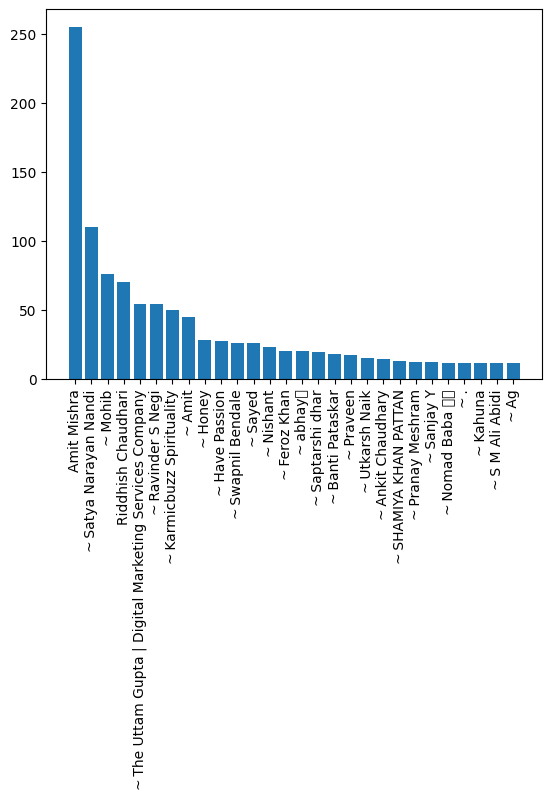

In [163]:
active_plot = plt.bar(active_users["user"], active_users["count"])
plt.xticks(rotation="vertical")
plt.show()

Conclusion: Most active user in Nilay

### Msg Sent based on percent

In [164]:
overall_active_user_df = round(df["user"].value_counts()[df["user"].value_counts()>10]/df.shape[0]*100).reset_index().rename(columns={'user':'Name', 'count':'Percent'})
overall_active_user_df

,Name,Percent
0,Amit Mishra,19.0
1,~ Satya Narayan Nandi,8.0
2,~ Mohib,6.0
3,Riddhish Chaudhari,5.0
4,~ The Uttam Gupta | Digital Marketing Services...,4.0
5,~ Ravinder S Negi,4.0
6,~ Karmicbuzz Spirituality,4.0
7,~ Amit,3.0
8,~ Honey,2.0
9,~ Have Passion,2.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Amit Mishra'),
  Text(1, 0, '~\u202fSatya Narayan Nandi'),
  Text(2, 0, '~\u202fMohib'),
  Text(3, 0, 'Riddhish Chaudhari'),
  Text(4, 0, '~\u202fThe Uttam Gupta | Digital Marketing Services Company'),
  Text(5, 0, '~\u202fRavinder S Negi'),
  Text(6, 0, '~\u202fKarmicbuzz Spirituality'),
  Text(7, 0, '~\u202fAmit'),
  Text(8, 0, '~\u202fHoney'),
  Text(9, 0, '~\u202fHave Passion'),
  Text(10, 0, '~\u202fSwapnil Bendale'),
  Text(11, 0, '~\u202fSayed'),
  Text(12, 0, '~\u202fNishant'),
  Text(13, 0, '~\u202fFeroz Khan'),
  Text(14, 0, '~\u202fabhay🔥'),
  Text(15, 0, '~\u202fSaptarshi dhar'),
  Text(16, 0, '~\u202fBanti Pataskar'),
  Text(17, 0, '~\u202fPraveen'),
  Text(18, 0, '~\u202fUtkarsh Naik'),
  Text(19, 0, '~\u202fAnkit Chaudhary'),
  Text(20, 0, '~\u202fSHAMIYA KHAN PATTAN'),
  Text(21, 0, '~\u202fPranay Me

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:93: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:93: UserWarning:

Glyph 128099 (\N{FOOTPRINTS}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:93: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128099 (\N{FOOTPRINTS}) missing from current font.

/Users/aayushgupta/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from curr

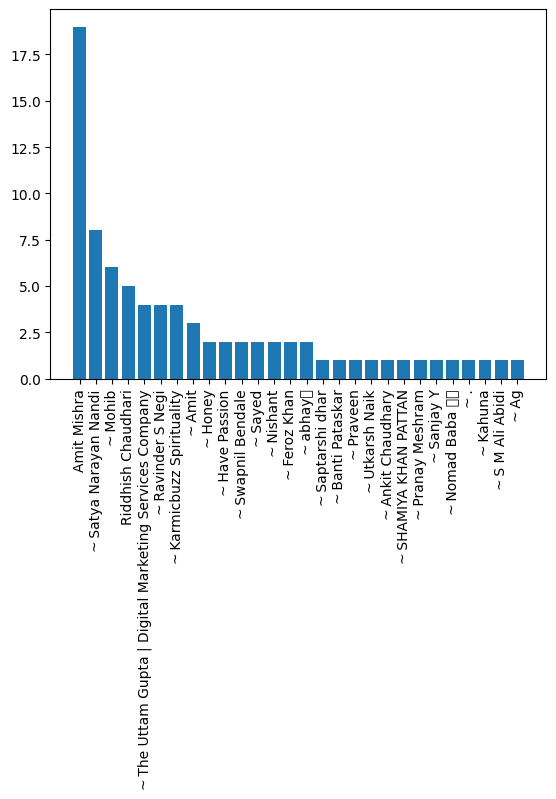

In [165]:
plt.bar(overall_active_user_df["Name"],overall_active_user_df["Percent"])
plt.xticks(rotation='vertical')

- Nilay has 32 percent countribution

### Wordcloud and Frequencies

In [166]:
message_data = df['message'].str.cat(sep=' ')
message_data = message_data.lower()
message_data = re.sub('[^a-zA-Z]', ' ', message_data)
message_data = re.sub('\s+',' ', message_data)

In [167]:
# To view in DF
message_data_df = pd.DataFrame(message_data.split(), columns=["Words"])
message_data_df = message_data_df.value_counts().reset_index()
message_data_df.head(10)

,Words,count
0,to,271
1,i,222
2,for,190
3,you,181
4,in,147
5,is,147
6,the,140
7,this,135
8,can,123
9,and,119


In [168]:
#importing the stopwords
stopwords_file = open('stopwords.txt')
stopwords = stopwords_file.read()
stopwords_file.close()
all_stopwords = stopwords.split() + ['haa','kr', 'omitted', 'sticker', 'image', 'https', 'www']

In [169]:
# filtered message data after removing stopwordss
filtered_text_data = []
for word in message_data.split():
    if word.lower() not in all_stopwords:
        filtered_text_data.append(word)
filtered_text_data = " ".join(filtered_text_data)

In [170]:
# To view in filtered DF
filtered_text_df = pd.DataFrame(filtered_text_data.split(), columns=["Words"])
filtered_text_df = filtered_text_df.value_counts().reset_index()
filtered_text_df.head(10)

,Words,count
0,website,62
1,message,58
2,amit,47
3,h,41
4,deleted,40
5,blog,39
6,group,38
7,hosting,35
8,google,34
9,hey,32


In [171]:
filtered_text_df["Freq. %"] = round((filtered_text_df["count"]/filtered_text_df["count"].sum())*100,2)
filtered_text_df.head(15)

,Words,count,Freq. %
0,website,62,1.15
1,message,58,1.07
2,amit,47,0.87
3,h,41,0.76
4,deleted,40,0.74
5,blog,39,0.72
6,group,38,0.70
7,hosting,35,0.65
8,google,34,0.63
9,hey,32,0.59


<BarContainer object of 15 artists>

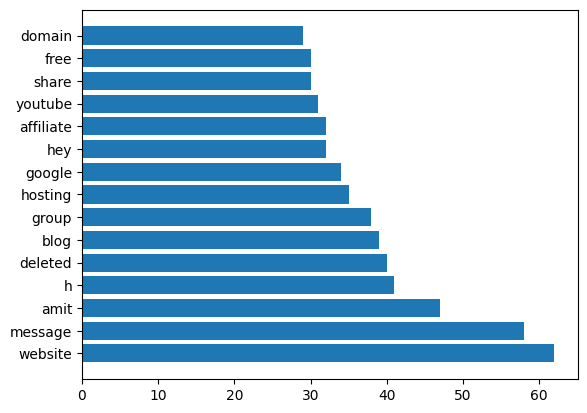

In [172]:
filtered_text_df = filtered_text_df.head(15)
plt.barh(filtered_text_df["Words"], filtered_text_df["count"])

In [173]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_data)

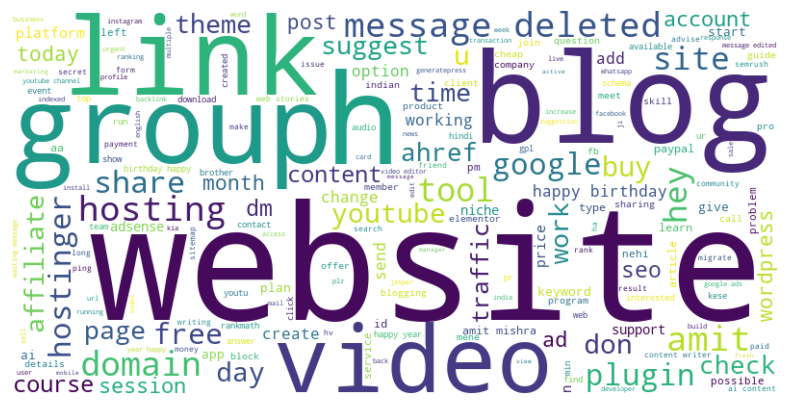

In [174]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Timeline Analysis

In [175]:
df['month_num'] = df["date"].dt.month

- Multi column in group by

In [176]:
df.groupby(['year','month_num']).count()

date  user  message  month  day  hour  minute
year month_num                                               
2019 8             3     3        3      3    3     3       3
2022 4            96    96       96     96   96    96      96
     5            99    99       99     99   99    99      99
     6            83    83       83     83   83    83      83
     7            58    58       58     58   58    58      58
     8           121   121      121    121  121   121     121
     9            62    62       62     62   62    62      62
     10          129   129      129    129  129   129     129
     11           84    84       84     84   84    84      84
     12           50    50       50     50   50    50      50
2023 1            61    61       61     61   61    61      61
     2            62    62       62     62   62    62      62
     3            29    29       29     29   29    29      29
     4            33    33       33     33   33    33      33
     5            11    11       11     11   11    11      11
     6            57    57       57     57   57    57      57
     7            86    86       86     86   86    86      86
     8            45    45       45     45   45    45      45
     9           153   153      153    153  153   153     153
     10            2     2        2      2    2     2       2

In [177]:
timeline_df = df.groupby(['year','month_num', 'month']).count()["message"].reset_index()[1:]
timeline_df

,year,month_num,month,message
1,2022,4,April,96
2,2022,5,May,99
3,2022,6,June,83
4,2022,7,July,58
5,2022,8,August,121
6,2022,9,September,62
7,2022,10,October,129
8,2022,11,November,84
9,2022,12,December,50
10,2023,1,January,61


- creating a time column with year and month for plotting

In [178]:
time = []
for i in range(1, timeline_df.shape[0]+1):
    time.append(timeline_df["month"][i] + '-' + str(timeline_df["year"][i]))
timeline_df['time'] = time
timeline_df

,year,month_num,month,message,time
1,2022,4,April,96,April-2022
2,2022,5,May,99,May-2022
3,2022,6,June,83,June-2022
4,2022,7,July,58,July-2022
5,2022,8,August,121,August-2022
6,2022,9,September,62,September-2022
7,2022,10,October,129,October-2022
8,2022,11,November,84,November-2022
9,2022,12,December,50,December-2022
10,2023,1,January,61,January-2023


#### Month Wise

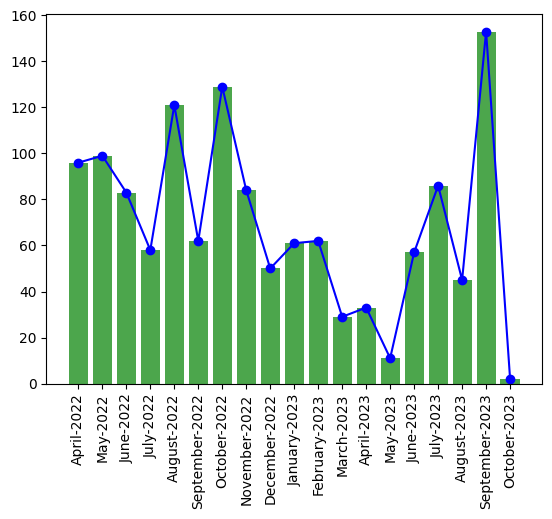

In [179]:
plt.bar(timeline_df['time'], timeline_df['message'], facecolor='green', alpha=0.7)
plt.scatter(timeline_df['time'], timeline_df['message'], color='blue', marker='o')
plt.plot(timeline_df['time'], timeline_df['message'], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [180]:
df['only_date'] = df['date'].dt.date

In [181]:
daily_timeline_df = df.groupby('only_date').count()["message"].reset_index()[1:]
daily_timeline_df.head(10)

,only_date,message
1,2022-04-14,13
2,2022-04-15,9
3,2022-04-16,11
4,2022-04-18,3
5,2022-04-19,11
6,2022-04-21,21
7,2022-04-24,8
8,2022-04-25,5
9,2022-04-26,7
10,2022-04-27,1


#### daily wise

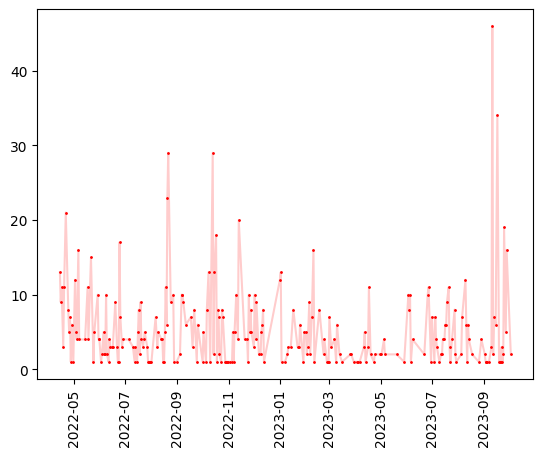

In [182]:
# plt.bar(daily_timeline_df['only_date'], daily_timeline_df['message'], facecolor='green', alpha=0.7)
plt.scatter(daily_timeline_df['only_date'], daily_timeline_df['message'], color='red', marker='o', s=1)
plt.plot(daily_timeline_df['only_date'], daily_timeline_df['message'], color='red', alpha=0.2)
plt.xticks(rotation='vertical')
plt.show()

#### weekdays wise

In [183]:
df['Weekday'] = df["date"].dt.day_name()
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,Weekday
0,2019-08-07 14:44:43,Blogging Masters Program,‎Messages and calls are end-to-end encrypted. ...,2019,August,7,14,44,8,2019-08-07,Wednesday
1,2019-08-07 14:44:43,Blogging Masters Program,‎Group creator created this group\n,2019,August,7,14,44,8,2019-08-07,Wednesday
2,2019-08-07 14:44:43,Blogging Masters Program,‎You were added\n,2019,August,7,14,44,8,2019-08-07,Wednesday
3,2022-04-14 13:13:17,‪+91 70565 65602‬,‎‪+91 70565 65602‬ left\n‎,2022,April,14,13,13,4,2022-04-14,Thursday
4,2022-04-14 12:51:06,Farhan Amit Sir,‎image omitted\n,2022,April,14,12,51,4,2022-04-14,Thursday


In [184]:
week_timeline_df = df['Weekday'].value_counts().reset_index()
week_timeline_df["Weekday"]
week_timeline_df["count"]

0    260
1    221
2    190
3    180
4    166
5    157
6    150
Name: count, dtype: int64

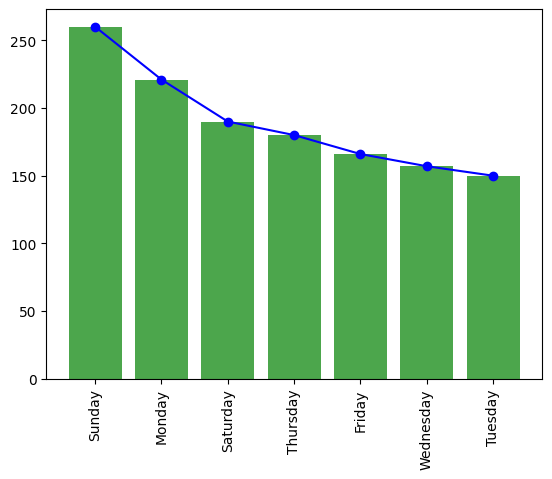

In [185]:
plt.bar(week_timeline_df["Weekday"], week_timeline_df["count"], facecolor='green', alpha=0.7)
plt.scatter(week_timeline_df["Weekday"], week_timeline_df["count"], color='blue', marker='o')
plt.plot(week_timeline_df["Weekday"], week_timeline_df["count"], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [186]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,Weekday
0,2019-08-07 14:44:43,Blogging Masters Program,‎Messages and calls are end-to-end encrypted. ...,2019,August,7,14,44,8,2019-08-07,Wednesday
1,2019-08-07 14:44:43,Blogging Masters Program,‎Group creator created this group\n,2019,August,7,14,44,8,2019-08-07,Wednesday
2,2019-08-07 14:44:43,Blogging Masters Program,‎You were added\n,2019,August,7,14,44,8,2019-08-07,Wednesday
3,2022-04-14 13:13:17,‪+91 70565 65602‬,‎‪+91 70565 65602‬ left\n‎,2022,April,14,13,13,4,2022-04-14,Thursday
4,2022-04-14 12:51:06,Farhan Amit Sir,‎image omitted\n,2022,April,14,12,51,4,2022-04-14,Thursday


In [187]:
period = []
for hour in df[['hour','Weekday']]['hour']:
    if hour == 23:
        period. append(str(hour) + "-" + str('00' ))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
df['period']=period

In [188]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,Weekday,period
0,2019-08-07 14:44:43,Blogging Masters Program,‎Messages and calls are end-to-end encrypted. ...,2019,August,7,14,44,8,2019-08-07,Wednesday,14-15
1,2019-08-07 14:44:43,Blogging Masters Program,‎Group creator created this group\n,2019,August,7,14,44,8,2019-08-07,Wednesday,14-15
2,2019-08-07 14:44:43,Blogging Masters Program,‎You were added\n,2019,August,7,14,44,8,2019-08-07,Wednesday,14-15
3,2022-04-14 13:13:17,‪+91 70565 65602‬,‎‪+91 70565 65602‬ left\n‎,2022,April,14,13,13,4,2022-04-14,Thursday,13-14
4,2022-04-14 12:51:06,Farhan Amit Sir,‎image omitted\n,2022,April,14,12,51,4,2022-04-14,Thursday,12-13


- added period for better understanding of duration

In [189]:
hour_timeline_df = df.groupby(['hour','period']).count()["message"].reset_index()
hour_timeline_df

,hour,period,message
0,0,00-1,30
1,1,1-2,9
2,2,2-3,7
3,3,3-4,3
4,4,4-5,3
5,5,5-6,2
6,6,6-7,8
7,7,7-8,16
8,8,8-9,41
9,9,9-10,64


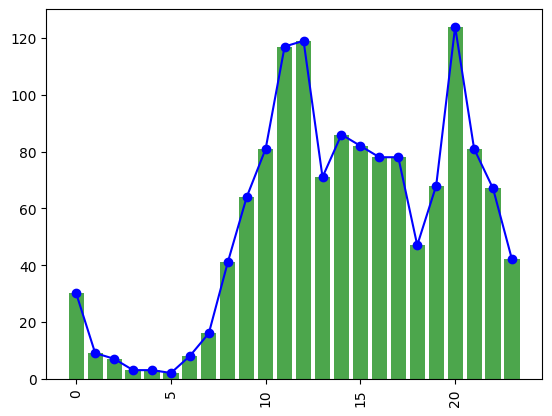

In [190]:
plt.bar(hour_timeline_df["hour"], hour_timeline_df["message"], facecolor='green', alpha=0.7)
plt.scatter(hour_timeline_df["hour"], hour_timeline_df["message"], color='blue', marker='o')
plt.plot(hour_timeline_df["hour"], hour_timeline_df["message"], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [191]:
heatmap_df = df.pivot_table(index='Weekday', columns='period', values='message', aggfunc='count')
heatmap_df

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,4.0,NaN,8.0,19.0,27.0,11.0,3.0,2.0,10.0,1.0,...,7.0,9.0,6.0,1.0,NaN,NaN,NaN,1.0,3.0,7.0
Monday,1.0,2.0,18.0,10.0,34.0,11.0,8.0,7.0,16.0,17.0,...,14.0,5.0,9.0,2.0,NaN,NaN,1.0,4.0,9.0,6.0
Saturday,NaN,2.0,9.0,22.0,6.0,9.0,25.0,13.0,21.0,11.0,...,5.0,9.0,4.0,NaN,NaN,NaN,NaN,2.0,5.0,16.0
Sunday,18.0,NaN,10.0,10.0,6.0,11.0,27.0,37.0,8.0,21.0,...,8.0,21.0,6.0,NaN,3.0,2.0,1.0,1.0,1.0,10.0
Thursday,4.0,2.0,12.0,23.0,19.0,15.0,NaN,6.0,11.0,11.0,...,25.0,9.0,8.0,NaN,NaN,NaN,2.0,2.0,5.0,12.0
Tuesday,1.0,2.0,12.0,21.0,7.0,1.0,14.0,4.0,6.0,10.0,...,11.0,8.0,3.0,NaN,NaN,NaN,2.0,5.0,14.0,7.0
Wednesday,2.0,1.0,12.0,12.0,20.0,13.0,9.0,13.0,6.0,7.0,...,11.0,6.0,6.0,NaN,NaN,NaN,2.0,1.0,4.0,6.0


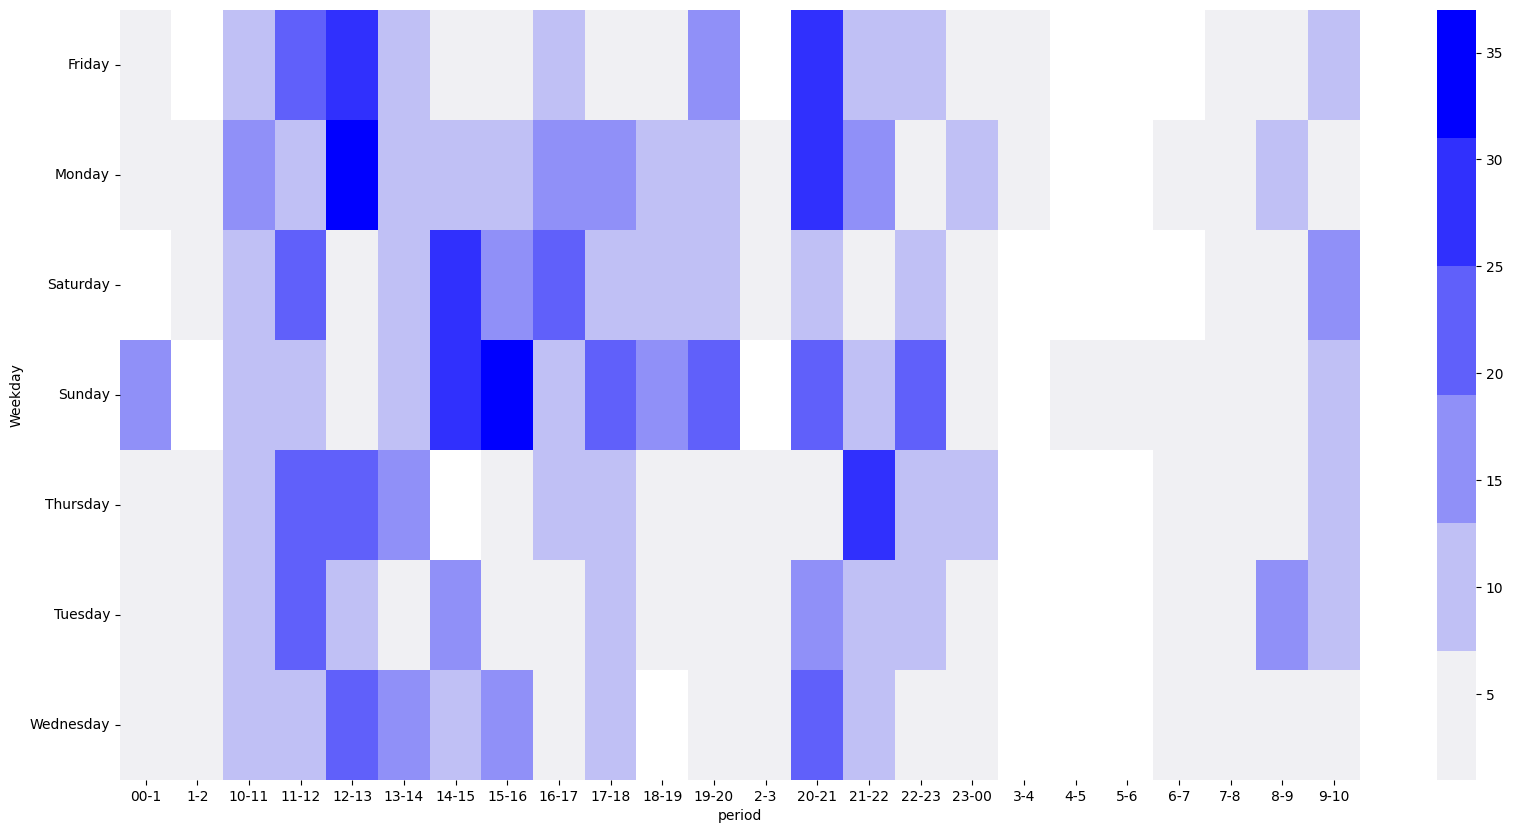

In [192]:
plt.figure(figsize=(20,10))
light_palette = sns.color_palette("light:b")
sns.heatmap(heatmap_df, cmap=light_palette)
plt.yticks(rotation='horizontal')
plt.show()

#### Individual level information

In [ ]:
user_most_active_weekday = df[df["user"]=='Nilay 2nd Floor'].groupby('Weekday').count()["message"].sort_values(ascending=False).reset_index()["Weekday"][1]

In [ ]:
active_users = df["user"].value_counts()[df["user"].value_counts()>10].reset_index()
active_users[active_users.user=='Aayush'].index[0]

2

# Test Area

In [ ]:
df["user"].value_counts()[df["user"].value_counts()>10].reset_index()['user'].tolist()

['Nilay 2nd Floor', 'Ashish Yadav Amity', 'Aayush', 'Ritesh Amity']

In [ ]:
users_list = df["user"].value_counts()[df["user"].value_counts()>10].reset_index()['user'].tolist()

In [ ]:
media_msg = df[df["message"].str.contains('omitted')]["message"].to_list()
media_type = []
for i in media_msg:
    new = re.sub('^a-zA-Z','', i)
    new = new.split()[0]
    media_type.append(new)
top_media_df =  pd.DataFrame(media_type,columns=['Media']).value_counts().reset_index().head(5)

‎image


In [ ]:
fig = px.pie(top_media_df, names='Media', values='count', title='Media Type Distribution')
fig.show()